In [57]:
from bs4 import  BeautifulSoup
import requests
import pandas as pd

In [58]:
years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018,
         2022]


In [59]:
def get_matches(year):
  web =f"https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup"
  response = requests.get(web)
  content = response.text
  soup = BeautifulSoup(content, "html.parser")
  matches = soup.find_all('div' , class_='footballbox')
  home_team = []
  score = []
  away_team = []
  for match in matches:
      home_team.append(match.find('th', class_='fhome').get_text())
      score.append(match.find('th', class_='fscore').get_text())
      away_team.append(match.find('th', class_='faway').get_text())

  dict_fifa = {'home_team': home_team, 'score': score, 'away_team': away_team}
  df_fifa = pd.DataFrame(dict_fifa)
  df_fifa['year'] = year
  return df_fifa

In [60]:
print(get_matches(2022))

       home_team         score     away_team  year
0         Qatar            0–2       Ecuador  2022
1       Senegal            0–2   Netherlands  2022
2         Qatar            1–3       Senegal  2022
3   Netherlands            1–1       Ecuador  2022
4       Ecuador            1–2       Senegal  2022
..           ...           ...           ...   ...
59      England            1–2        France  2022
60    Argentina            3–0       Croatia  2022
61       France            2–0       Morocco  2022
62      Croatia            2–1       Morocco  2022
63    Argentina   3–3 (a.e.t.)        France  2022

[64 rows x 4 columns]


In [61]:
fifa = [get_matches(year) for year in years]
df_football = pd.concat(fifa, ignore_index=True)
df_football.to_csv("fifa_worldcup_historical_data.csv", index=False)

In [62]:
import pandas as pd
data = pd.read_csv('/content/fifa_worldcup_historical_data.csv')
print(data.head())



    home_team score away_team  year
0     France    4–1    Mexico  1930
1  Argentina    1–0    France  1930
2      Chile    3–0    Mexico  1930
3      Chile    1–0    France  1930
4  Argentina    6–3    Mexico  1930


In [63]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   home_team  929 non-null    object
 1   score      929 non-null    object
 2   away_team  929 non-null    object
 3   year       929 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 29.2+ KB
None


In [64]:
print(data.isnull().sum())

home_team    0
score        0
away_team    0
year         0
dtype: int64


In [65]:
print(data.duplicated().sum())

0


In [66]:
non_numeric_scores = data[~data['score'].str.contains(r'\d+–\d+')]
print("Non-numeric score entries:")
print(non_numeric_scores)



Non-numeric score entries:
   home_team score away_team  year
37   Sweden    w/o   Austria  1938


In [67]:
def process_score(row):
    if 'w/o' in row['score']:
        return pd.Series([None, None])
    else:
        return pd.Series(row['score'].split('–'))

data[['home_score', 'away_score']] = data.apply(process_score, axis=1)

data['home_score'] = pd.to_numeric(data['home_score'], errors='coerce')
data['away_score'] = pd.to_numeric(data['away_score'], errors='coerce')

data.drop(columns=['score'], inplace=True)
print("Updated dataset with scores processed:")
print(data.head())
print(data.info())


Updated dataset with scores processed:
    home_team away_team  year  home_score  away_score
0     France     Mexico  1930         4.0         1.0
1  Argentina     France  1930         1.0         0.0
2      Chile     Mexico  1930         3.0         0.0
3      Chile     France  1930         1.0         0.0
4  Argentina     Mexico  1930         6.0         3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   929 non-null    object 
 1   away_team   929 non-null    object 
 2   year        929 non-null    int64  
 3   home_score  928 non-null    float64
 4   away_score  855 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 36.4+ KB
None


In [68]:
total_matches = len(data)
print(f"Total matches in the dataset: {total_matches}")

total_goals = data['home_score'].sum() + data['away_score'].sum()
print(f"Total goals scored: {total_goals}")

avg_goals_per_match = total_goals / total_matches
print(f"Average goals per match: {avg_goals_per_match:.2f}")

matches_per_year = data['year'].value_counts().sort_index()
print("\nMatches played per year:")
print(matches_per_year)


Total matches in the dataset: 929
Total goals scored: 2546.0
Average goals per match: 2.74

Matches played per year:
year
1930    18
1934    17
1938    19
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    16
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
2022    64
Name: count, dtype: int64


# HIGH SCORING **MATCHES**

In [69]:

data['total_goals'] = data['home_score'] + data['away_score']
high_scoring_matches = data.nlargest(10, 'total_goals')

print("Top 10 High-Scoring Matches:")
print(high_scoring_matches[['home_team', 'away_team', 'home_score', 'away_score', 'year', 'total_goals']])


Top 10 High-Scoring Matches:
         home_team       away_team  home_score  away_score  year  total_goals
94        Austria      Switzerland         7.0         5.0  1954         12.0
82        Hungary     West Germany         8.0         3.0  1954         11.0
322       Hungary      El Salvador        10.0         1.0  1982         11.0
109        France         Paraguay         7.0         3.0  1958         10.0
4       Argentina           Mexico         6.0         3.0  1930          9.0
81        Hungary      South Korea         9.0         0.0  1954          9.0
84   West Germany           Turkey         7.0         2.0  1954          9.0
135        France     West Germany         6.0         3.0  1958          9.0
241    Yugoslavia            Zaire         9.0         0.0  1974          9.0
21          Italy    United States         7.0         1.0  1934          8.0


# **TEAM PERFORMANCE**

In [70]:
data['winner'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score']
                                    else (row['away_team'] if row['away_score'] > row['home_score'] else 'Draw'), axis=1)


team_wins = data['winner'].value_counts()

print("Team Wins:")
print(team_wins)

draws = data[data['winner'] == 'Draw']
print(f"\nNumber of draws: {len(draws)}")


Team Wins:
winner
Draw                 239
Brazil                58
Argentina             38
Italy                 30
France                25
                    ... 
South Africa           1
 Jamaica               1
Northern Ireland       1
 Norway                1
Morocco                1
Name: count, Length: 113, dtype: int64

Number of draws: 239


# **HISTORICAL TRENDS**

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

goals_per_year = data.groupby('year')['total_goals'].sum()
matches_per_year = data['year'].value_counts().sort_index()


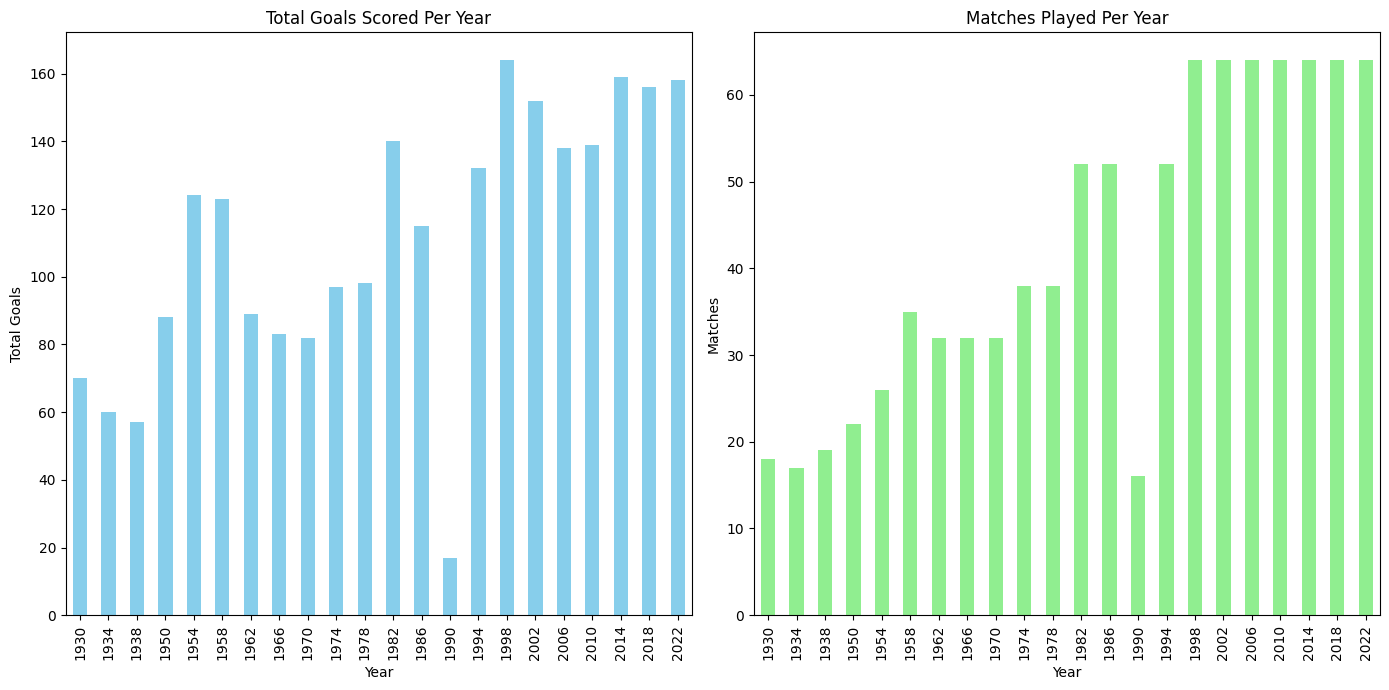

In [72]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
goals_per_year.plot(kind='bar', color='skyblue')
plt.title("Total Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Total Goals")

plt.subplot(1, 2, 2)
matches_per_year.plot(kind='bar', color='lightgreen')
plt.title("Matches Played Per Year")
plt.xlabel("Year")
plt.ylabel("Matches")

plt.tight_layout()
plt.show()

# **GOAL DIFFERENTIAL**

In [73]:
goals_scored = pd.concat([
    data.groupby('home_team')['home_score'].sum(),
    data.groupby('away_team')['away_score'].sum()], axis=1).fillna(0).sum(axis=1)

goals_conceded = pd.concat([
    data.groupby('home_team')['away_score'].sum(),
    data.groupby('away_team')['home_score'].sum()
], axis=1).fillna(0).sum(axis=1)

goal_differential = goals_scored - goals_conceded
goal_differential = goal_differential.sort_values(ascending=False)
print("Teams Ranked by Goal Differential:")
print(goal_differential.head(10))


Teams Ranked by Goal Differential:
Brazil           124.0
Argentina         73.0
West Germany      60.0
Italy             58.0
Hungary           56.0
France            48.0
England           48.0
Germany           38.0
Uruguay           33.0
Portugal          32.0
dtype: float64


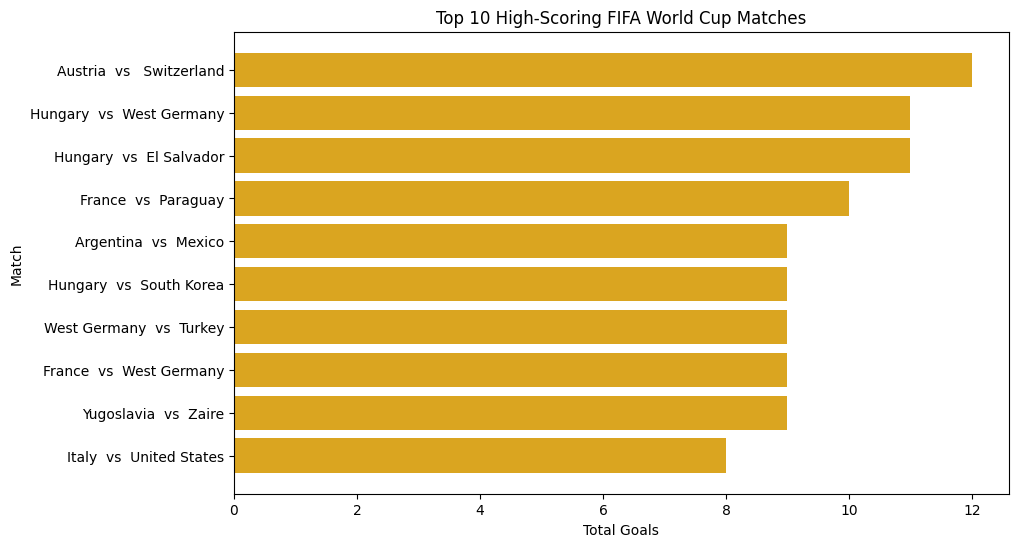

In [74]:
import matplotlib.pyplot as plt

top_matches = data.nlargest(10, 'total_goals')

plt.figure(figsize=(10, 6))
plt.barh(top_matches['home_team'] + " vs " + top_matches['away_team'],
         top_matches['total_goals'], color='goldenrod')
plt.xlabel("Total Goals")
plt.ylabel("Match")
plt.title("Top 10 High-Scoring FIFA World Cup Matches")
plt.gca().invert_yaxis()
plt.show()


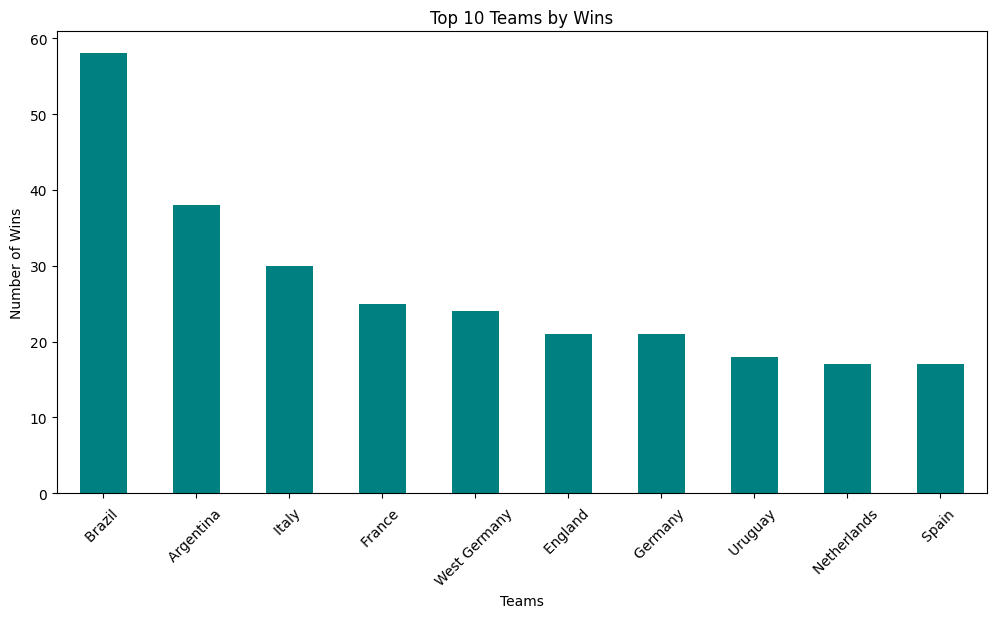

In [75]:
top_winning_teams = team_wins[team_wins.index != 'Draw'].head(10)

plt.figure(figsize=(12, 6))
top_winning_teams.plot(kind='bar', color='teal')
plt.title("Top 10 Teams by Wins")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


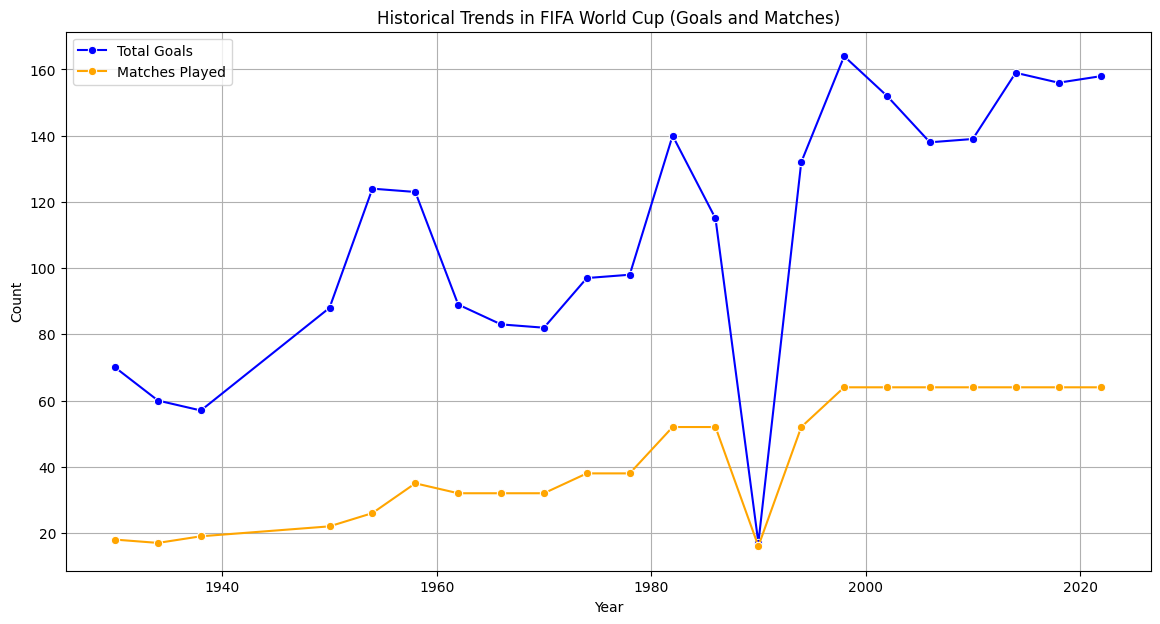

In [76]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=goals_per_year.index, y=goals_per_year.values, label='Total Goals', marker='o', color='blue')
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, label='Matches Played', marker='o', color='orange')

plt.title("Historical Trends in FIFA World Cup (Goals and Matches)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


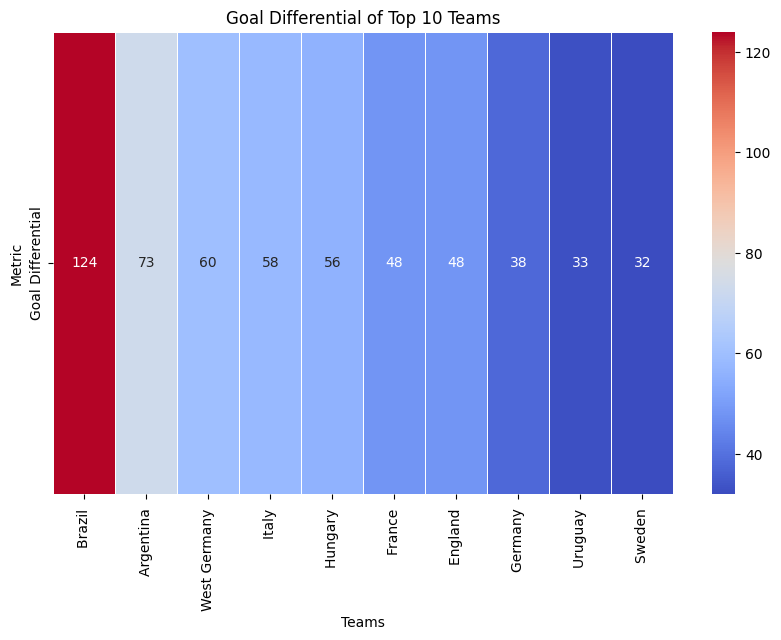

In [77]:
team_goal_diff = pd.DataFrame({'Goal Differential': goal_differential})
pivot_data = team_goal_diff.sort_values(by='Goal Differential', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data.T, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Goal Differential of Top 10 Teams")
plt.xlabel("Teams")
plt.ylabel("Metric")
plt.show()


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data_encoded = data.copy()
data_encoded['home_team'] = data_encoded['home_team'].astype('category').cat.codes
data_encoded['away_team'] = data_encoded['away_team'].astype('category').cat.codes

features = data_encoded[['home_team', 'away_team', 'home_score', 'away_score']]
data_encoded['outcome'] = data_encoded['winner'].apply(lambda x: 0 if x == 'Draw' else (1 if x == 'home_team' else 2))
target = data_encoded['outcome']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training and testing datasets prepared.")


Training and testing datasets prepared.


In [79]:
#Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           2       1.00      1.00      1.00       135

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186

Accuracy: 1.00
